In [1]:
import sys
sys.path.append('../draevsky/src/')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [45]:
train = pd.read_csv('train_2.csv').fillna(0)

In [46]:
def move_up_values(df, up=5):
    df.loc[:, df.dtypes == float] += up

In [47]:
move_up_values(train)

In [48]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,23.0,16.0,10.0,18.0,19.0,14.0,14.0,27.0,31.0,...,24.0,38.0,38.0,23.0,21.0,32.0,34.0,28.0,59.0,43.0
1,2PM_zh.wikipedia.org_all-access_spider,16.0,19.0,20.0,23.0,16.0,18.0,27.0,16.0,15.0,...,37.0,35.0,16.0,24.0,59.0,30.0,31.0,28.0,18.0,86.0
2,3C_zh.wikipedia.org_all-access_spider,6.0,5.0,6.0,6.0,5.0,9.0,5.0,8.0,9.0,...,11.0,11.0,12.0,7.0,9.0,12.0,8.0,9.0,12.0,11.0
3,4minute_zh.wikipedia.org_all-access_spider,40.0,18.0,15.0,99.0,9.0,31.0,19.0,14.0,16.0,...,12.0,24.0,24.0,14.0,11.0,21.0,24.0,35.0,43.0,9.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,21.0,21.0,24.0,14.0,25.0,28.0,33.0,19.0,13.0,12.0


In [28]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res.group(0)[0:2]
    return 'na'

train['lang'] = train.Page.map(get_language)

from collections import Counter

print(Counter(train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [29]:
lang_sets = {}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

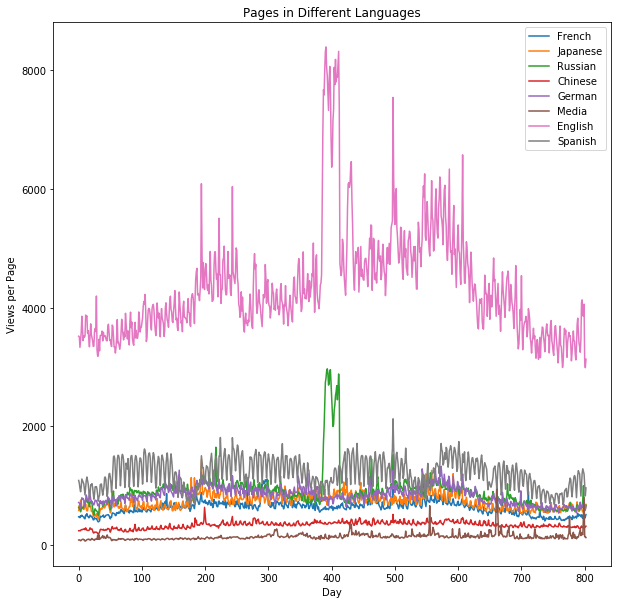

In [30]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

In [32]:
def total_w(set_l):
    total_view = {} 
    for key in language_set:
        total_view[key] = set_l[key].iloc[:, 1:].sum(axis=0) / set_l[key].shape[0]

In [33]:
def top_d(set_l, npages = 5):
    top_pages = {}
    for key in set_l:
        sum_set = pd.DataFrame(set_l[key][['Page']])
        sum_set['total'] = set_l[key].sum(axis=1)
        sum_set = sum_set.sort_values('total',ascending=False)
        top_pages[key] = sum_set.index[0]
    

In [49]:
YEAR_SHIFT = 364
PERIOD = 49
PREDICT_PERIOD = 75

In [50]:
def safe_median(s):
    return np.median([x for x in s if ~np.isnan(x)])

In [51]:
def smape(x, y):
    if x == y:
        return 0
    else:
        return np.abs(x-y)/(x+y)

In [52]:
train = pd.melt(train[list(train.columns[-(YEAR_SHIFT + 2*PERIOD):])+['Page']], id_vars='Page', var_name='date', value_name='Visits')
train['date'] = train['date'].astype('datetime64[ns]')

LAST_TRAIN_DAY = train['date'].max()

train = train.groupby(['Page'])["Visits"].apply(lambda x: list(x))

In [54]:
train.head()

Page
!vote_en.wikipedia.org_all-access_all-agents                 [11.0, 8.0, 8.0, 9.0, 8.0, 7.0, 7.0, 11.0, 5.0...
!vote_en.wikipedia.org_all-access_spider                     [9.0, 7.0, 7.0, 5.0, 6.0, 5.0, 6.0, 8.0, 5.0, ...
!vote_en.wikipedia.org_desktop_all-agents                    [11.0, 8.0, 8.0, 9.0, 8.0, 7.0, 7.0, 10.0, 5.0...
"Awaken,_My_Love!"_en.wikipedia.org_all-access_all-agents    [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...
"Awaken,_My_Love!"_en.wikipedia.org_all-access_spider        [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...
Name: Visits, dtype: object

In [55]:
pred_dict = {}

count = 0
scount = 0

for page, row in zip(train.index, train):
    last_month = np.array(row[-PERIOD:])
    slast_month = np.array(row[-2*PERIOD:-PERIOD])
    prev_last_month = np.array(row[PERIOD:2*PERIOD])
    prev_slast_month = np.array(row[:PERIOD])
    
    use_last_year = False
    if ~np.isnan(row[0]):
        #calculate yearly prediction error
        year_increase = np.median(slast_month)/np.median(prev_slast_month)
        year_error = np.sum(list(map(lambda x: smape(x[0], x[1]), zip(last_month, prev_last_month * year_increase))))
        
        #calculate monthly prediction error
        smedian = np.median(slast_month)
        month_error = np.sum(list(map(lambda x: smape(x, smedian), last_month)))
        
        #check if yearly prediction is better than median prediction in the previous period
        error_diff = (month_error - year_error)/PERIOD
        if error_diff > 0.1:
            scount += 1
            use_last_year = True
    
    if use_last_year:
        last_year = np.array(row[2*PERIOD:2*PERIOD+PREDICT_PERIOD])
        preds = last_year * year_increase #consider yearly increase while using the last years visits
    else:
        preds = [0]*PREDICT_PERIOD
        windows = np.array([2, 3, 4, 7, 11, 18, 29, 47])*7 #kind of fibonacci
        medians = np.zeros((len(windows), 7))
        for i in range(7):
            for k in range(len(windows)):
                array = np.array(row[-windows[k]:]).reshape(-1, 7)
                # use 3-day window. for example, Friday: [Thursday, Friday, Saturday]
                s = np.hstack([array[:, (i-1)%7], array[:, i], array[:, (i+1)%7]]).reshape(-1)
                medians[k, i] = safe_median(s)
        for i in range(PREDICT_PERIOD):
            preds[i] = safe_median(medians[:, i%7])
                
    pred_dict[page] = preds
    
    count += 1        
    if count % 1000 == 0:
        print(count, scount)

del train
print("Yearly prediction is done on the percentage:", scount/count)

1000 42
2000 119
3000 195
4000 239
5000 266
6000 313
7000 361
8000 416
9000 462
10000 504
11000 538
12000 550
13000 597
14000 644
15000 648
16000 652
17000 656
18000 671
19000 713
20000 747
21000 839
22000 902
23000 919
24000 965
25000 988
26000 1075
27000 1145
28000 1175
29000 1221
30000 1241
31000 1264
32000 1266
33000 1276
34000 1281
35000 1285
36000 1298
37000 1328
38000 1375
39000 1433
40000 1475
41000 1534
42000 1553
43000 1556
44000 1563
45000 1621
46000 1649
47000 1719
48000 1744
49000 1762
50000 1782
51000 1829
52000 1843
53000 1883
54000 1911
55000 1957
56000 2001
57000 2055
58000 2085
59000 2116
60000 2132
61000 2162
62000 2194
63000 2236
64000 2267
65000 2313
66000 2361
67000 2390
68000 2457
69000 2492
70000 2534
71000 2589
72000 2643
73000 2695
74000 2738
75000 2807
76000 2844
77000 2888
78000 2928
79000 2968
80000 2994
81000 3053
82000 3054
83000 3057
84000 3088
85000 3140
86000 3180
87000 3198
88000 3222
89000 3282
90000 3310
91000 3343
92000 3383
93000 3437
94000 3448
9

In [59]:
type(pred_dict)

dict

In [60]:
np.save('pred_dict.npy', pred_dict) 


In [56]:
test = pd.read_csv("key_2.csv")

In [57]:
move_up_values(test)


test['date'] = test.Page.apply(lambda a: a[-10:])
test['Page'] = test.Page.apply(lambda a: a[:-11])
test['date'] = test['date'].astype('datetime64[ns]')

test["date"] = test["date"].apply(lambda x: int((x - LAST_TRAIN_DAY).days) - 1)

def func(row):
    return pred_dict[row["Page"]][row["date"]]

test["Visits"] = test.apply(func, axis=1)

test.loc[test.Visits.isnull(), 'Visits'] = 0
test['Visits'] = test['Visits'].values + test['Visits'].values*0.03 # overestimating is usually better for smape
test.Visits = test.Visits.round(4)

test[['Id','Visits']].to_csv('submission.csv', index=False)